### Load data first

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import time
import sys

sys.path.append(os.path.abspath(".."))   # Add root path to sys.path
os.chdir("..")  # Change working directory to root path

from src.preprocessing import read_image, windy_preprocessing_pipeline
from tqdm import tqdm
from datetime import datetime

In [10]:
from src.preprocessing import read_numpy_grid, nexrad_numpy_preprocessing_pipeline
from tqdm.notebook import tqdm

data_name = "KARX"
SOURCE_PATH = f"data/numpy_grid/{data_name}"

img_paths = [
    os.path.join(SOURCE_PATH, img_name) for img_name in sorted(os.listdir(SOURCE_PATH)) if img_name.endswith('.npy')
][:20]

img_shape = read_numpy_grid(img_paths[0]).shape       # get shape of the image

print(f"Image shape: {img_shape}")
print(f"-" * 20)

time_frames = []
dbz_maps = []    

for path in tqdm(img_paths, desc="Processing images and detecting storms"):
    file_name = path.split("/")[-1].split(".")[0]
    # time_frames.append(datetime.strptime(file_name[:-4], '%Y%m%d-%H%M%S'))       # Get file name without extension
    time_frames.append(datetime.strptime(file_name[4:19], "%Y%m%d_%H%M%S"))       # Get file name without extension
    img = read_numpy_grid(path)
    dbz_maps.append(nexrad_numpy_preprocessing_pipeline(img))

print(f"Number of frames: {len(dbz_maps)}")

Image shape: (901, 901)
--------------------


Processing images and detecting storms:   0%|          | 0/20 [00:00<?, ?it/s]

Number of frames: 20


In [3]:
# file_name = "philippines_13.269_123.832"

# SOURCE_PATH = f"data/image_old/{file_name}"

# img_paths = [
#     os.path.join(SOURCE_PATH, img_name) for img_name in sorted(os.listdir(SOURCE_PATH)) if img_name.endswith('.png')
# ][:20]

# img_shape = read_image(img_paths[0]).shape       # get shape of the image
# print(f"Image shape: {img_shape}")
# print(f"-" * 20)

# time_frames = []
# dbz_maps = []       

# for path in tqdm(img_paths, desc="Processing images and detecting storms"):
#     time_frames.append(datetime.strptime(os.path.basename(path).split('/')[0][:-4], '%Y%m%d-%H%M%S'))       # Get file name without extension
#     img = read_image(path)
#     dbz_maps.append(windy_preprocessing_pipeline(img))

# print(f"Number of frames: {len(dbz_maps)}")

## Load model

In [11]:
from src.models import OursPrecipitationModel
from src.identification import HypothesisIdentifier

model = OursPrecipitationModel(identifier=HypothesisIdentifier())

storms_maps = []

for idx, (dbz_map, time_frame) in enumerate(tqdm(zip(dbz_maps, time_frames), total=len(dbz_maps), desc="Detecting storms")):
    storms_map = model.identify_storms(dbz_map, time_frame, map_id=f"time_{idx}", threshold=35, filter_area=50)
    storms_maps.append(storms_map)

Detecting storms:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_0_storm_0:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_0_storm_1:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_0:   0%|          | 0/33 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_1:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_2:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_2_storm_0:   0%|          | 0/34 [00:00<?, ?it/s]

Constructing shape vectors for time_2_storm_1:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_2_storm_2:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_3_storm_0:   0%|          | 0/35 [00:00<?, ?it/s]

Constructing shape vectors for time_3_storm_1:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_3_storm_2:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_4_storm_0:   0%|          | 0/35 [00:00<?, ?it/s]

Constructing shape vectors for time_4_storm_1:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_4_storm_2:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_4_storm_3:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_0:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_1:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_2:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_0:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_1:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_2:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_3:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_0:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_1:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_2:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_0:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_1:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_2:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_3:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_4:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_0:   0%|          | 0/36 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_1:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_2:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_3:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_4:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_5:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_6:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_7:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_8:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_0:   0%|          | 0/37 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_1:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_2:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_3:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_4:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_5:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_6:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_0:   0%|          | 0/37 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_1:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_2:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_3:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_4:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_5:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_6:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_7:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_0:   0%|          | 0/37 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_1:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_2:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_3:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_4:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_5:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_6:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_7:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_8:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_0:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_1:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_2:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_3:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_4:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_5:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_6:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_7:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_8:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_9:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_10:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_11:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_12:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_0:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_1:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_2:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_3:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_4:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_5:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_6:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_7:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_8:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_9:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_10:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_11:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_12:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_13:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_0:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_1:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_2:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_3:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_4:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_5:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_6:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_7:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_8:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_9:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_10:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_11:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_12:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_13:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_14:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_0:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_1:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_2:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_3:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_4:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_5:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_6:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_7:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_8:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_9:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_10:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_11:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_12:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_13:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_0:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_1:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_2:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_3:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_4:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_5:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_6:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_7:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_8:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_9:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_10:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_12:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_13:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_0:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_1:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_2:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_3:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_4:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_5:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_6:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_7:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_8:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_9:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_10:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_12:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_13:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_14:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_15:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_0:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_1:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_2:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_3:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_4:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_5:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_6:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_7:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_8:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_9:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_10:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_12:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_13:   0%|          | 0/3 [00:00<?, ?it/s]

## Benchmark model
Assume that storm do not change overtime, use previous map as the predicted map

In [12]:
from src.cores.base import StormsMap
from src.cores.metrics import pod_score, far_score, csi_score

class PredictionBenchmarkModel:
    def __init__(self):
        self.pods = []
        self.fars = []
        self.csis = []
        self.actual = []
        self.predicted = []

    def evaluate_predict(self, actual_storms_map: StormsMap, predicted_storms_map: StormsMap):
        self.actual.append(actual_storms_map)
        self.predicted.append(predicted_storms_map)
        self.pods.append(pod_score(actual_storms_map, predicted_storms_map))
        self.fars.append(far_score(actual_storms_map, predicted_storms_map))
        self.csis.append(csi_score(actual_storms_map, predicted_storms_map))

# Create benchmark model
benchmark_model = PredictionBenchmarkModel()
PREDICT_FORWARD_STEPS = 3                           # 1 hour ahead
SLOW_START_STEPS = 10

for t in tqdm(range(PREDICT_FORWARD_STEPS, len(storms_maps)), desc="Evaluating benchmark model"):
    actual_storms_map = storms_maps[t]
    predicted_storms_map = storms_maps[t - PREDICT_FORWARD_STEPS]  # Assume storm do not change
    benchmark_model.evaluate_predict(actual_storms_map, predicted_storms_map)

print("Benchmark Model evaluation results:")
print(f"\tAverage POD: {np.mean(benchmark_model.pods):.4f}")
print(f"\tAverage FAR: {np.mean(benchmark_model.fars):.4f}")
print(f"\tAverage CSI: {np.mean(benchmark_model.csis):.4f}")

Evaluating benchmark model:   0%|          | 0/17 [00:00<?, ?it/s]

Benchmark Model evaluation results:
	Average POD: 0.1928
	Average FAR: 0.8423
	Average CSI: 0.0976


## Testing model tracking

In [13]:
max_velocity = 100
weights = (0.5, 0.5)        # weights for (spatial distance, shape vector difference)

model = OursPrecipitationModel(identifier=HypothesisIdentifier(), max_velocity=max_velocity, weights=weights)  # max_velocity in pixels per hour
temp_storm_map = storms_maps

ours_model_evaluation = PredictionBenchmarkModel()
predicted_maps = []

for i in range(SLOW_START_STEPS):
    model.processing_map(temp_storm_map[i])  # Warm-up phase

for curr_map, future_map in tqdm(list(zip(temp_storm_map[SLOW_START_STEPS:], temp_storm_map[PREDICT_FORWARD_STEPS + SLOW_START_STEPS:])), desc="Predicting precipitation maps"):
    # Predict map using current data
    dt_seconds = (future_map.time_frame - model.storms_maps[-1].time_frame).total_seconds()
    predicted_map = model.forecast(dt_seconds)
    ours_model_evaluation.evaluate_predict(future_map, predicted_map)

    # Update new map into knowledge
    model.processing_map(curr_map)  # Update model with the current map

print("Our model evaluation:")
print(f"\tAverage POD: {np.mean(ours_model_evaluation.pods):.4f}")
print(f"\tAverage FAR: {np.mean(ours_model_evaluation.fars):.4f}")
print(f"\tAverage CSI: {np.mean(ours_model_evaluation.csis):.4f}")

Predicting precipitation maps:   0%|          | 0/7 [00:00<?, ?it/s]

Our model evaluation:
	Average POD: 0.6415
	Average FAR: 0.5326
	Average CSI: 0.3747


# Overall Analyzing on tracking process
In this tracking, I used both of the median duration and linearity error of tracking

### A. Meadian duration tracking

Median duration of tracking: 3.0 frames
Maximum duration of tracking: 16 frames
Mean duration of tracking: 4.79 frames


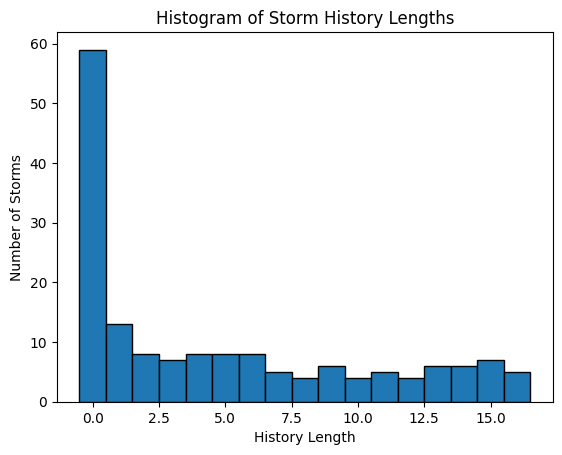

In [14]:
HISTORY_LENGTH_LST = []             # Retrieve history length of all storms

for storms_map in storms_maps:
    for storm in storms_map.storms:
        HISTORY_LENGTH_LST.append(len(storm.history_movements))   # Append history length of each storm

MEDIAN_DURATION = np.median(HISTORY_LENGTH_LST)

print(f"Median duration of tracking: {MEDIAN_DURATION} frames")
print(f"Maximum duration of tracking: {max(HISTORY_LENGTH_LST)} frames")
print(f"Mean duration of tracking: {np.mean(HISTORY_LENGTH_LST):.2f} frames")

plt.hist(HISTORY_LENGTH_LST, bins=range(0, max(HISTORY_LENGTH_LST) + 2), align='left', edgecolor='black')
plt.title("Histogram of Storm History Lengths")
plt.xlabel("History Length")
plt.ylabel("Number of Storms")
plt.show()

### B. Linearity error tracking
Use linearity to track the different between linear fitting of previous history against the actual matched movement

In [15]:
from sklearn.linear_model import LinearRegression
from functools import reduce
import matplotlib.pyplot as plt

def linear_error(movement_history: list[tuple[float, float]]) -> float:
    """
    Compute the linear fitting error distance of final point to the fitted line of previous points.
    """
    points = reduce(lambda points, movement: points + [(points[-1][0] + movement[0], points[-1][1] + movement[1])], movement_history, [(0, 0)])

    # Compute the linear fit parameters
    points = np.array(points)
    x = points[:-1, 0]
    y = points[:-1, 1]

    model = LinearRegression().fit(x.reshape(-1, 1), y)

    # Compute the distance from the final point to the fitted line
    final_point = points[-1]

    return abs(final_point[1] - (model.coef_[0] * final_point[0] + model.intercept_)) / np.sqrt(model.coef_[0]**2 + 1)

# Accumulate linear errors for all storms
LINEAR_ERRORS_LST = []

for storms_map in tqdm(storms_maps, desc="Computing linear fitting errors for storms"):
    for storm in storms_map.storms:
        # If not enough history, skip
        if len(storm.history_movements) <= MEDIAN_DURATION:
            continue

        # Fit linear model
        error_distance = linear_error(storm.history_movements[:-1]) ** 2      # Final one used for evaluate the movement prediction
        LINEAR_ERRORS_LST.append(error_distance)

print(f"RMSE of linear fitting errors: {np.sqrt(np.mean(LINEAR_ERRORS_LST)):.4f}. Total length: {len(LINEAR_ERRORS_LST)}")

Computing linear fitting errors for storms:   0%|          | 0/20 [00:00<?, ?it/s]

RMSE of linear fitting errors: 22.2564. Total length: 76


In [17]:
import colorsys

def spectral_colors(n: int) -> list[list[int]]:
    """
    Generate n RGB colors following the visible spectrum.
    
    Parameters
    ----------
    n : int
        Number of colors to generate.
    
    Returns
    -------
    list[list[int]]
        List of RGB colors (each element is [R, G, B], with values 0–255).
    """
    colors = []
    for i in range(n):
        # Hue ranges from 0.0 (red) to 0.83 (violet) approximately
        hue = i / max(1, n - 1) * 0.83  
        r, g, b = colorsys.hsv_to_rgb(hue, 1.0, 1.0)
        colors.append([int(r * 255), int(g * 255), int(b * 255)])
    return colors

Processing all storm maps for movement history visualization:   0%|          | 0/20 [00:00<?, ?it/s]

----  CURRENT MAP at time 2023-08-11 21:30:04  ----
Storm 0: Number of movement history records: 19
Storm 1: Number of movement history records: 19
Storm 2: Number of movement history records: 10
Storm 3: Number of movement history records: 19
Storm 4: Number of movement history records: 19
Storm 5: Number of movement history records: 10
Storm 6: Number of movement history records: 9
Storm 7: Number of movement history records: 4
Storm 8: Number of movement history records: 4
Storm 9: Number of movement history records: 11
Storm 10: Number of movement history records: 11
Storm 11: Number of movement history records: 19
Storm 12: Number of movement history records: 0
Storm 13: Number of movement history records: 0


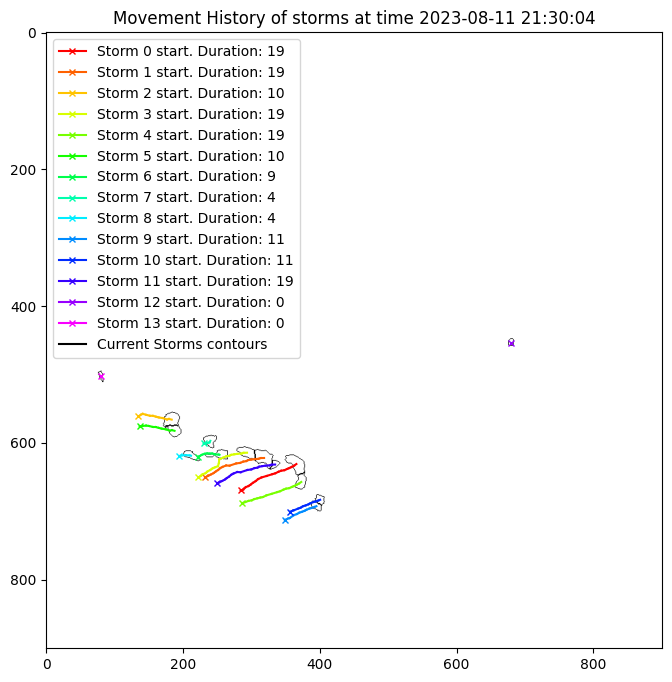

In [18]:
from src.preprocessing import convert_polygons_to_contours

num_maps = len(storms_maps)
MAX_VELOCITY = 100              # pixels per hour

model = OursPrecipitationModel(identifier=HypothesisIdentifier(), max_velocity=MAX_VELOCITY)  # max_velocity in pixels per hour

for i in tqdm(range(num_maps), desc="Processing all storm maps for movement history visualization"):
    model.processing_map(storms_maps[i])  # Warm-up phase

plt.figure(figsize=(8, 8))
blank_img = np.ones(shape=(img_shape[0], img_shape[1], 3), dtype=np.uint8) * 255

current_map = storms_maps[-1]
print(f"----  CURRENT MAP at time {current_map.time_frame.strftime('%Y-%m-%d %H:%M:%S')}  ----")

colors = spectral_colors(len(current_map.storms))

for idx, storm in enumerate(current_map.storms):
    print(f"Storm {idx}: Number of movement history records: {len(storm.history_movements)}")
    current_frame = current_map.time_frame

    color = np.array(colors[idx]) / 255.0
    end_point = (storm.contour.centroid.x, storm.contour.centroid.y)

    # backtrack the movement history
    for move_idx, movement in enumerate(storm.history_movements):
        prev_frame = storms_maps[-(move_idx + 2)].time_frame
        dt = (current_frame - prev_frame).seconds / 3600
        current_frame = prev_frame

        dy, dx = movement[0] * dt, movement[1] * dt

        start = end_point[0] - dx, end_point[1] - dy
        plt.plot([start[0], end_point[0]], [start[1], end_point[1]], color=color)
        end_point = start
    
    plt.plot(end_point[0], end_point[1], marker='x', color=color, markersize=5, label=f'Storm {idx} start. Duration: {len(storm.history_movements)}')

contours = convert_polygons_to_contours([storm.contour for storm in current_map.storms])
cv2.drawContours(blank_img, contours, -1, (0, 0, 0), 1)
plt.plot([], [], color='black', label='Current Storms contours')
plt.title(f"Movement History of storms at time {current_map.time_frame.strftime('%Y-%m-%d %H:%M:%S')}")

plt.imshow(blank_img)
plt.legend()

plt.show()